In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
online_retail=pd.read_excel("Online_Retail.xlsx")
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
online_retail.shape

(541909, 8)

In [4]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
online_retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
online_retail=online_retail.dropna(subset=['CustomerID'])

In [7]:
online_retail.shape

(406829, 8)

In [8]:
online_retail['InvoiceNo'].value_counts()

InvoiceNo
576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
C549986      1
C555409      1
C555411      1
536369       1
C581323      1
Name: count, Length: 22190, dtype: int64

In [9]:
online_retail=online_retail[~online_retail['InvoiceNo'].astype(str).str.startswith('C')]
online_retail.shape


(397924, 8)

In [10]:
online_retail=online_retail[(online_retail['Quantity']>0)& (online_retail['UnitPrice']>0)]
online_retail.shape

(397884, 8)

In [11]:
online_retail['TotalPrice']=online_retail['Quantity']*online_retail['UnitPrice']
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [12]:
online_retail['Country'].value_counts().head(10)

Country
United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Netherlands         2359
Belgium             2031
Switzerland         1841
Portugal            1462
Australia           1182
Name: count, dtype: int64

In [13]:
online_retail.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalPrice, dtype: float64

In [14]:
online_retail.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: TotalPrice, dtype: float64

In [15]:
online_retail['TotalPrice'].sum()

np.float64(8911407.904)

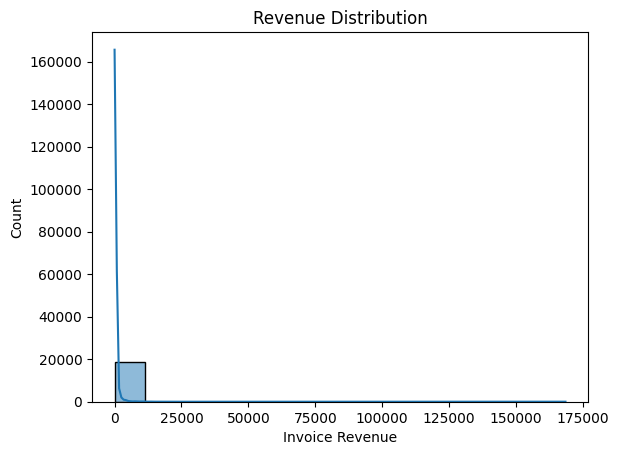

In [16]:
invoice_rev = online_retail.groupby("InvoiceNo")["TotalPrice"].sum()

sns.histplot(invoice_rev, bins=15  , kde=True)
plt.title("Revenue Distribution")
plt.xlabel("Invoice Revenue")
plt.ylabel("Count")
plt.show()


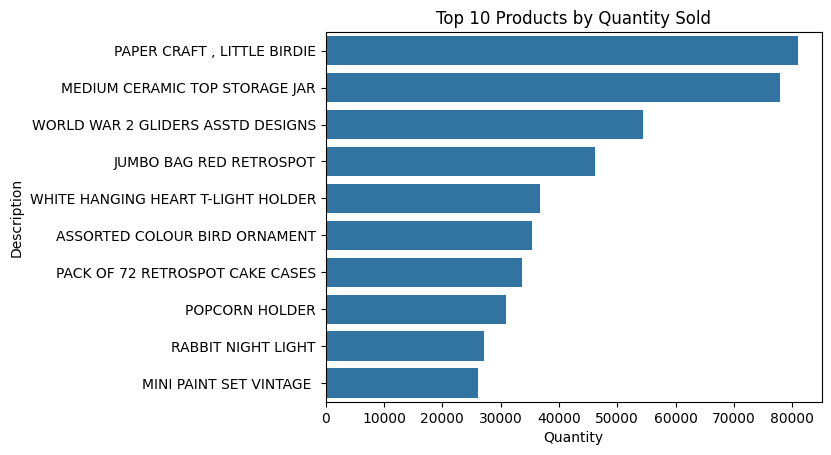

In [17]:
top_product_qty=online_retail.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(top_product_qty,orient='h')
plt.title('Top 10 Products by Quantity Sold');

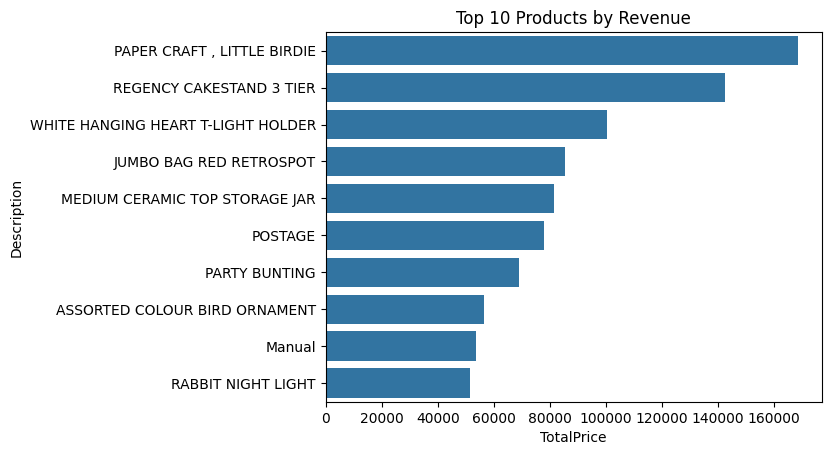

In [18]:
top_prooduct_revenue=online_retail.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
sns.barplot(top_prooduct_revenue,orient='h')
plt.title('Top 10 Products by Revenue');

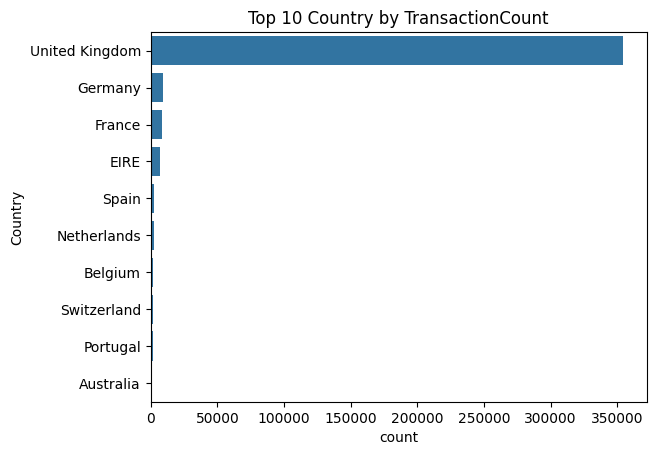

In [19]:
top_country=online_retail['Country'].value_counts().head(10)
sns.barplot(top_country,orient='h')
plt.title('Top 10 Country by TransactionCount')
plt.show();


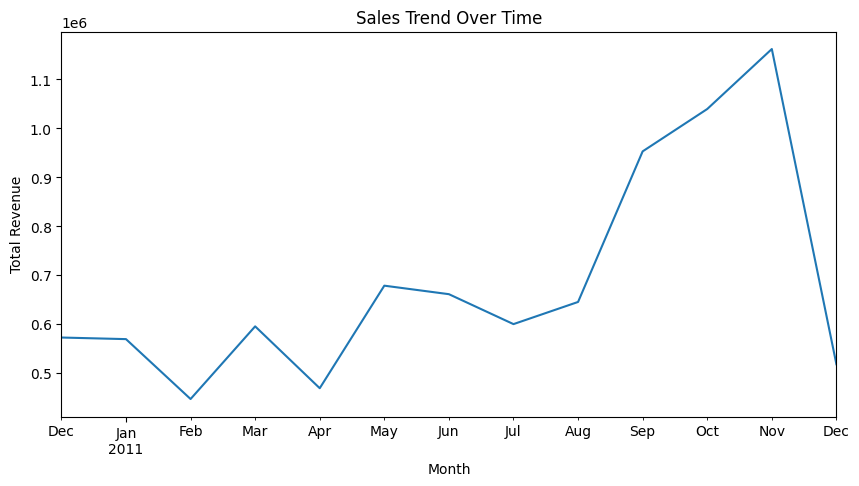

In [20]:
online_retail["InvoiceDate"] = pd.to_datetime(online_retail["InvoiceDate"])
online_retail["Month"] = online_retail["InvoiceDate"].dt.to_period("M")

online_retail.groupby("Month")["TotalPrice"].sum().plot(figsize=(10,5))
plt.title("Sales Trend Over Time")
plt.ylabel("Total Revenue")
plt.show()


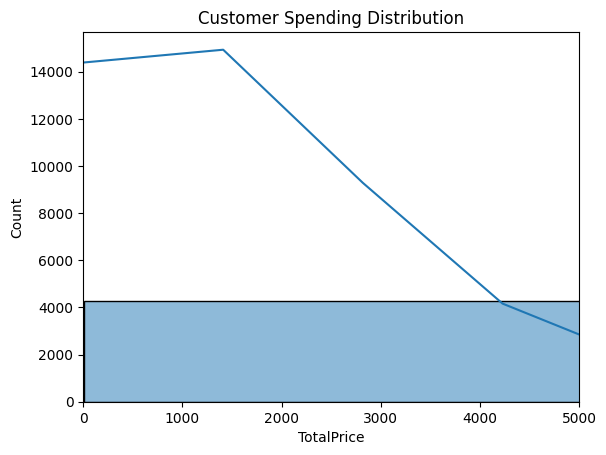

In [21]:
customer_spend = online_retail.groupby("CustomerID")["TotalPrice"].sum()
sns.histplot(customer_spend, bins=15, kde=True)
plt.title("Customer Spending Distribution")
plt.xlim(0, 5000)
plt.show()


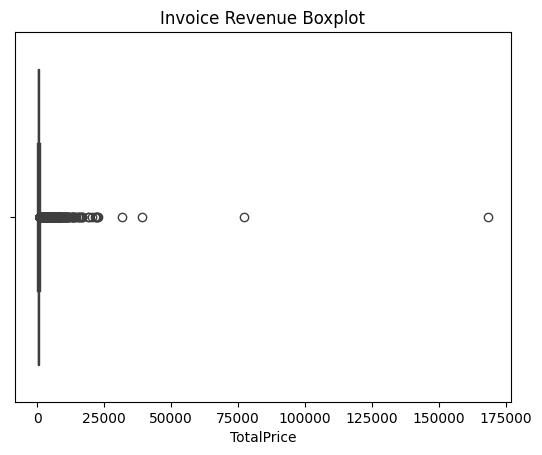

In [22]:
invoice_rev = online_retail.groupby("InvoiceNo")["TotalPrice"].sum()
sns.boxplot(x=invoice_rev)
plt.title("Invoice Revenue Boxplot")
plt.show()


ML-Based Segmentation Using K-Means

In [23]:
# STEP 1 — Create RFM table
# Reference date (1 day after last purchase)
import datetime as dt
ref_date = online_retail['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = online_retail.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [24]:
# STEP 2 — Scale the data (K-Means needs scaling)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

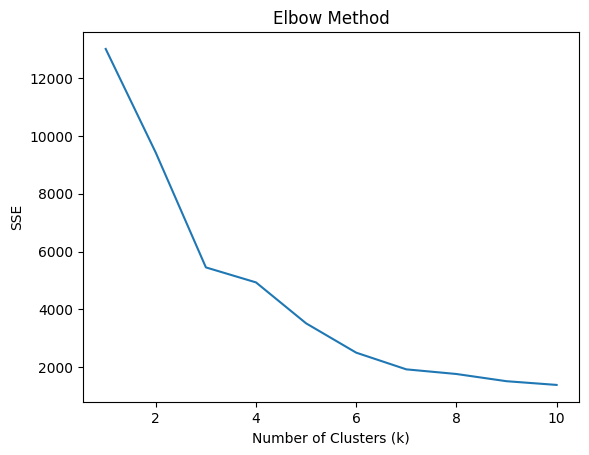

In [25]:
# STEP 3 — Choose number of clusters (Elbow Method)
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(rfm_scaled)
    sse.append(km.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()


In [26]:
# STEP 4 — Train K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)

rfm['Cluster'] = kmeans.labels_


In [27]:
# STEP 5 — Analyze segments
rfm.groupby('Cluster').mean()


,Recency,Frequency,Monetary
Cluster,,,
0,20.990788,135.285122,2645.818172
1,98.218703,37.719457,773.877083
2,4.692308,2565.307692,126118.310000
3,272.407005,25.138889,605.842525


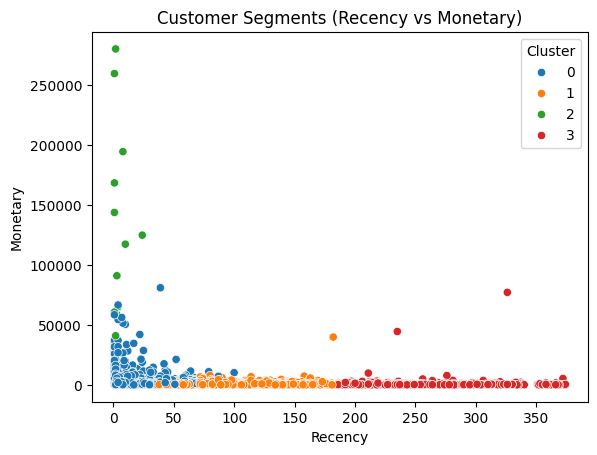

In [28]:
# STEP 6 — Visualize the clusters
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='tab10')
plt.title("Customer Segments (Recency vs Monetary)")
plt.show()

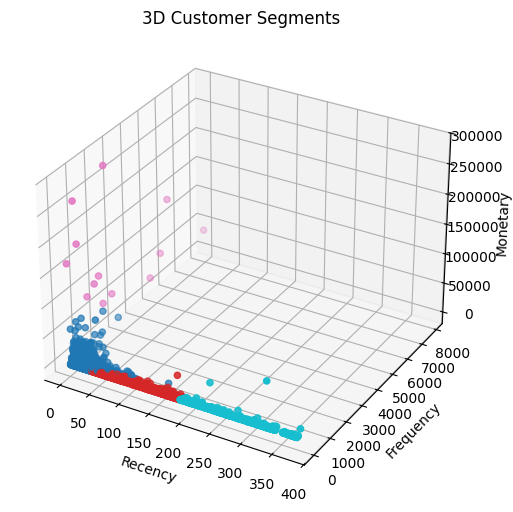

In [29]:
# 3D plot (Recency, Frequency, Monetary)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], c=rfm['Cluster'], cmap='tab10')
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
plt.title("3D Customer Segments")
plt.show()


In [30]:
pip >requirement.txt

Note: you may need to restart the kernel to use updated packages.


📌 Customer Segmentation Summary — Online Retail (2010–2011)

Techniques Used: EDA, RFM Analysis, Standard Scaling, K-Means Clustering, 2D & 3D Visualization

Goal: Identify meaningful customer groups to improve marketing, retention, and revenue.

🧩 1. RFM Feature Engineering

I calculated three key business metrics for each customer:

Recency – number of days since the last purchase

Frequency – number of transactions made

Monetary – total revenue contributed

These three metrics were combined into an RFM table, then scaled for K-Means clustering.

📊 2. Optimal Cluster Selection

Using the Elbow Method (k = 1 to 10), the curve showed a clear elbow at k = 4,
indicating four meaningful customer segments.

🎯 3. Customer Segments Identified

Based on RFM averages, the clusters represent four distinct customer types:

🔵 Cluster 2 — VIP / Champions (Highest Value Group)

Behavior Pattern:

Very low Recency → purchase very recently

Extremely high Frequency

Highest Monetary value

Interpretation:
These customers drive the majority of revenue. They are highly engaged and loyal.

Business Action:

Exclusive deals

Priority service

Early product access

Loyalty rewards

🟢 Cluster 0 — Loyal Regulars

Behavior Pattern:

Low Recency

Moderate Frequency

Healthy Monetary value

Interpretation:
Consistent, dependable buyers who can be upgraded to VIP status.

Business Action:

Offer cross-sell / upsell

Personalized product recommendations

Small loyalty perks to increase frequency

🟠 Cluster 1 — At-Risk Customers

Behavior Pattern:

High Recency (haven’t purchased recently)

Low Frequency

Low to mid Monetary value

Interpretation:
These shoppers are drifting away. They used to purchase but do so rarely now.

Business Action:

Re-engagement emails

Discounts or limited-time offers

Win-back campaigns

🔴 Cluster 3 — Lost / Low-Value Customers

Behavior Pattern:

Longest Recency

Lowest Frequency

Lowest Monetary value

Interpretation:
Minimal business value; likely churned customers.

Business Action:

Limit marketing spend

Send occasional “come back” offers

Do not invest heavily in this segment

🌐 4. Visualization Overview

2D scatter (Recency vs Monetary) clearly separated high-value vs low-value shoppers.

3D scatter (Recency-Frequency-Monetary) showed distinct cluster patterns in 3D space.

Visuals confirmed the K-Means clustering quality.

📈 5. Business Impact

This segmentation enables:

Targeted marketing

Better retention strategies

Improved budgeting for promotions

Understanding of revenue-driving customer groups

Smarter decision-making using data-driven RFM insights

🏁 Final Conclusion

Using RFM and K-Means, four unique customer groups were identified.

Each group shows significantly different purchasing behavior, letting the company:

✔ Maximize loyalty

✔ Recover at-risk customers

✔ Allocate marketing budget effectively

✔ Increase overall revenue

This segmentation provides a powerful foundation for personalized marketing and business growth.